<a href="https://colab.research.google.com/github/ErayImamoglu/ML-TFIDF-BOW/blob/main/MLAlgorithms_BoWandTF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

df=pd.read_csv("/content/train_set_cost_related-_2_.csv")

# Get indices of rows with label 0 and label 1
indices_0 = df[df['CostRelated'] == 0].index
indices_1 = df[df['CostRelated'] == 1].index

# Randomly sample the required number of indices with label 0
random_indices_0 = np.random.choice(indices_0, len(indices_1), replace=False)

# Combine the indices
under_sample_indices = np.concatenate([indices_1, random_indices_0])

# Create the undersampled DataFrame
under_sampled_df = df.loc[under_sample_indices]

# Shuffle the resulting DataFrame for good measure
under_sampled_df = under_sampled_df.sample(frac=1).reset_index(drop=True)

under_sampled_df["CostRelated"] = under_sampled_df["CostRelated"].astype(int)

df=under_sampled_df

df["Text"][0]

'The Consultant shall ensure that his proposed personnel is duly qualified, is able to design all required parts of main design and competently to carry out the tasks assigned in accordance with the scope of the contract.'

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop])  # Remove stopwords
    return text

df["Text"] = df.Text.apply(preprocess_text)
df["Text"][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'consultant shall ensure proposed personnel duly qualified able design required parts main design competently carry tasks assigned accordance scope contract'

In [ ]:
#remove stopwords - not kelimesini atılmadan algoritma başarısını karşılaştır.
#pip install ntlk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words("english"))

def remove_stopwords(Text):
  filtered_words=[word.lower() for word in Text.split() if word.lower() not in stop]
  return " ".join(filtered_words)

df["Text"]=df.Text.map(remove_stopwords) # bu olay çıkarıyor

df["Text"][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'consultant shall ensure proposed personnel duly qualified able design required parts main design competently carry tasks assigned accordance scope contract'

In [ ]:
from collections import Counter

def counter_word(text_col):
  count = Counter()
  for text in text_col.values:
    for word in text.split():
      count[word] += 1
  return count

counter = counter_word(df.Text)
num_unique_words = len(counter)

print(num_unique_words)

1791


In [ ]:
# Split dataset into training and validation set
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Split text and labels
train_sentences = train_df.Text.to_numpy()
train_labels = train_df.CostRelated.to_numpy()
val_sentences = val_df.Text.to_numpy()
val_labels = val_df.CostRelated.to_numpy()

train_sentences[1]

'consultants provide facilities requirements construction supervision maintenance pbm period include support staff office accommodation facilities office equipment supplies furniture logistics vehicles communications tl office respective site offices'

In [ ]:
# Bag of Words
vectorizer_bow = CountVectorizer()
train_bow = vectorizer_bow.fit_transform(train_sentences)
val_bow = vectorizer_bow.transform(val_sentences)
print("First Train Sentence:", train_sentences[1])
print("First Train Sentence with BOW:", train_bow[1])

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
train_tfidf = vectorizer_tfidf.fit_transform(train_sentences)
val_tfidf = vectorizer_tfidf.transform(val_sentences)
print("First Train Sentence with TF-IDF:", train_tfidf[1])

In [ ]:
# For BoW
word_list_bow = vectorizer_bow.get_feature_names_out()

# For TF-IDF
word_list_tfidf = vectorizer_tfidf.get_feature_names_out()

# Example: To get the word at index 348 for BoW
print(word_list_bow[348])

# Example: To get the word at index 997 for TF-IDF
print(word_list_tfidf[997])


consultants
offices


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Support Vector Machine (SVM) with BoW
svm_model_bow = SVC()
svm_model_bow.fit(train_bow, train_labels)
svm_pred_bow = svm_model_bow.predict(val_bow)
svm_accuracy_bow = accuracy_score(val_labels, svm_pred_bow)
print("SVM with BoW Accuracy:", svm_accuracy_bow)

# For BoW
svm_precision_bow = precision_score(val_labels, svm_pred_bow)
svm_recall_bow = recall_score(val_labels, svm_pred_bow)
svm_f1_bow = f1_score(val_labels, svm_pred_bow)
print("SVM with BoW Precision:", svm_precision_bow)
print("SVM with BoW Recall:", svm_recall_bow)
print("SVM with BoW F1-Score:", svm_f1_bow)

# Support Vector Machine (SVM) with TF-IDF
svm_model_tfidf = SVC()
svm_model_tfidf.fit(train_tfidf, train_labels)
svm_pred_tfidf = svm_model_tfidf.predict(val_tfidf)
svm_accuracy_tfidf = accuracy_score(val_labels, svm_pred_tfidf)
print("SVM with TF-IDF Accuracy:", svm_accuracy_tfidf)

# For TF-IDF
svm_precision_tfidf = precision_score(val_labels, svm_pred_tfidf)
svm_recall_tfidf = recall_score(val_labels, svm_pred_tfidf)
svm_f1_tfidf = f1_score(val_labels, svm_pred_tfidf)
print("SVM with TF-IDF Precision:", svm_precision_tfidf)
print("SVM with TF-IDF Recall:", svm_recall_tfidf)
print("SVM with TF-IDF F1-Score:", svm_f1_tfidf)

SVM with BoW Accuracy: 0.8918918918918919
SVM with BoW Precision: 0.9743589743589743
SVM with BoW Recall: 0.8444444444444444
SVM with BoW F1-Score: 0.9047619047619048
SVM with TF-IDF Accuracy: 0.918918918918919
SVM with TF-IDF Precision: 0.975609756097561
SVM with TF-IDF Recall: 0.8888888888888888
SVM with TF-IDF F1-Score: 0.9302325581395349


In [ ]:
# Naive Bayes with BoW
nb_model_bow = MultinomialNB()
nb_model_bow.fit(train_bow, train_labels)
nb_pred_bow = nb_model_bow.predict(val_bow)
nb_accuracy_bow = accuracy_score(val_labels, nb_pred_bow)
print("Naive Bayes with BoW Accuracy:", nb_accuracy_bow)

# For BoW
nb_precision_bow = precision_score(val_labels, nb_pred_bow)
nb_recall_bow = recall_score(val_labels, nb_pred_bow)
nb_f1_bow = f1_score(val_labels, nb_pred_bow)
print("NB with BoW Precision:", nb_precision_bow)
print("NB with BoW Recall:", nb_recall_bow)
print("NB with BoW F1-Score:", nb_f1_bow)

# Naive Bayes with TF-IDF
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(train_tfidf, train_labels)
nb_pred_tfidf = nb_model_tfidf.predict(val_tfidf)
nb_accuracy_tfidf = accuracy_score(val_labels, nb_pred_tfidf)
print("Naive Bayes with TF-IDF Accuracy:", nb_accuracy_tfidf)

# For TF-IDF
nb_precision_tfidf = precision_score(val_labels, nb_pred_tfidf)
nb_recall_tfidf = recall_score(val_labels, nb_pred_tfidf)
nb_f1_tfidf = f1_score(val_labels, nb_pred_tfidf)
print("NB with TF-IDF Precision:", nb_precision_tfidf)
print("NB with TF-IDF Recall:", nb_recall_tfidf)
print("NB with TF-IDF F1-Score:", nb_f1_tfidf)

Naive Bayes with BoW Accuracy: 0.9324324324324325
NB with BoW Precision: 0.9166666666666666
NB with BoW Recall: 0.9777777777777777
NB with BoW F1-Score: 0.946236559139785
Naive Bayes with TF-IDF Accuracy: 0.9594594594594594
NB with TF-IDF Precision: 0.9565217391304348
NB with TF-IDF Recall: 0.9777777777777777
NB with TF-IDF F1-Score: 0.967032967032967


In [ ]:
# Logistic Regression with BoW
log_model_bow = LogisticRegression()
log_model_bow.fit(train_bow, train_labels)
log_pred_bow = log_model_bow.predict(val_bow)
log_accuracy_bow = accuracy_score(val_labels, log_pred_bow)
print("Logistic Regression with BoW Accuracy:", log_accuracy_bow)

# For BoW
log_precision_bow = precision_score(val_labels, log_pred_bow)
log_recall_bow = recall_score(val_labels, log_pred_bow)
log_f1_bow = f1_score(val_labels, log_pred_bow)
print("LR with BoW Precision:", log_precision_bow)
print("LR with BoW Recall:", log_recall_bow)
print("LR with BoW F1-Score:", log_f1_bow)

# Logistic Regression with TF-IDF
log_model_tfidf = LogisticRegression()
log_model_tfidf.fit(train_tfidf, train_labels)
log_pred_tfidf = log_model_tfidf.predict(val_tfidf)
log_accuracy_tfidf = accuracy_score(val_labels, log_pred_tfidf)
print("Logistic Regression with TF-IDF Accuracy:", log_accuracy_tfidf)

# For TF-IDF
log_precision_tfidf = precision_score(val_labels, log_pred_tfidf)
log_recall_tfidf = recall_score(val_labels, log_pred_tfidf)
log_f1_tfidf = f1_score(val_labels, log_pred_tfidf)
print("LR with TF-IDF Precision:", log_precision_tfidf)
print("LR with TF-IDF Recall:", log_recall_tfidf)
print("LR with TF-IDF F1-Score:", log_f1_tfidf)

Logistic Regression with BoW Accuracy: 0.8918918918918919
LR with BoW Precision: 0.9512195121951219
LR with BoW Recall: 0.8666666666666667
LR with BoW F1-Score: 0.9069767441860465
Logistic Regression with TF-IDF Accuracy: 0.9054054054054054
LR with TF-IDF Precision: 0.975
LR with TF-IDF Recall: 0.8666666666666667
LR with TF-IDF F1-Score: 0.9176470588235294


In [ ]:
# Feedforward Neural Network with BoW
mlp_model_bow = MLPClassifier()
mlp_model_bow.fit(train_bow, train_labels)
mlp_pred_bow = mlp_model_bow.predict(val_bow)
mlp_accuracy_bow = accuracy_score(val_labels, mlp_pred_bow)
print("Feedforward Neural Network with BoW Accuracy:", mlp_accuracy_bow)

# For BoW
FFNN_precision_bow = precision_score(val_labels, mlp_pred_bow)
FFNN_recall_bow = recall_score(val_labels, mlp_pred_bow)
FFNN_f1_bow = f1_score(val_labels, mlp_pred_bow)
print("FFNN with BoW Precision:", FFNN_precision_bow)
print("FFNN with BoW Recall:", FFNN_recall_bow)
print("FFNN with BoW F1-Score:", FFNN_f1_bow)

# Feedforward Neural Network with TF-IDF
mlp_model_tfidf = MLPClassifier()
mlp_model_tfidf.fit(train_tfidf, train_labels)
mlp_pred_tfidf = mlp_model_tfidf.predict(val_tfidf)
mlp_accuracy_tfidf = accuracy_score(val_labels, mlp_pred_tfidf)
print("Feedforward Neural Network with TF-IDF Accuracy:", mlp_accuracy_tfidf)

# For TF-IDF
FFNN_precision_tfidf = precision_score(val_labels, mlp_pred_tfidf)
FFNN_recall_tfidf = recall_score(val_labels, mlp_pred_tfidf)
FFNN_f1_tfidf = f1_score(val_labels, mlp_pred_tfidf)
print("FFNN with TF-IDF Precision:", FFNN_precision_tfidf)
print("FFNN with TF-IDF Recall:", FFNN_recall_tfidf)
print("FFNN with TF-IDF F1-Score:", FFNN_f1_tfidf)

Feedforward Neural Network with BoW Accuracy: 0.918918918918919
FFNN with BoW Precision: 0.9333333333333333
FFNN with BoW Recall: 0.9333333333333333
FFNN with BoW F1-Score: 0.9333333333333333
Feedforward Neural Network with TF-IDF Accuracy: 0.918918918918919
FFNN with TF-IDF Precision: 0.9333333333333333
FFNN with TF-IDF Recall: 0.9333333333333333
FFNN with TF-IDF F1-Score: 0.9333333333333333


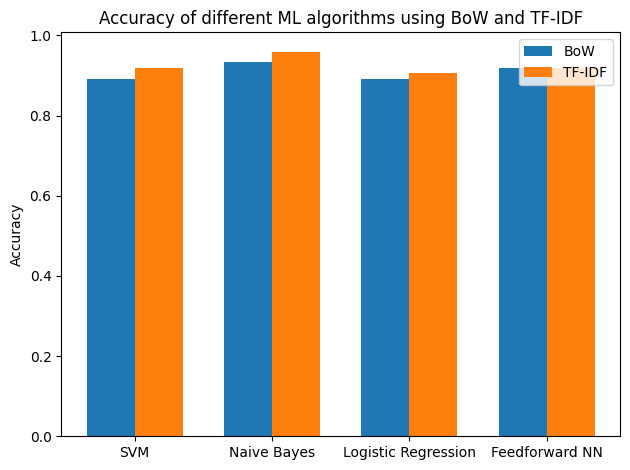

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['SVM', 'Naive Bayes', 'Logistic Regression', 'Feedforward NN']
bow_accuracies = [svm_accuracy_bow, nb_accuracy_bow, log_accuracy_bow, mlp_accuracy_bow]
tfidf_accuracies = [svm_accuracy_tfidf, nb_accuracy_tfidf, log_accuracy_tfidf, mlp_accuracy_tfidf]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Plot
fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, bow_accuracies, width, label='BoW')
rects2 = ax.bar(x + width/2, tfidf_accuracies, width, label='TF-IDF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of different ML algorithms using BoW and TF-IDF')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()
